## Sprawdzenie efektu aliasingu

In [1]:
import numpy as np
import sounddevice as sd
import matplotlib.pyplot as plt
from scipy.fftpack import fft

### 1. Generowanie sygnału dźwiękowego

In [4]:
fs = 44100  # Częstotliwość próbkowania (44.1 kHz)
t = np.linspace(0, 2, int(2 * fs), endpoint=False)
f = 8000  # 8 kHz
y = np.sin(2 * np.pi * f * t)

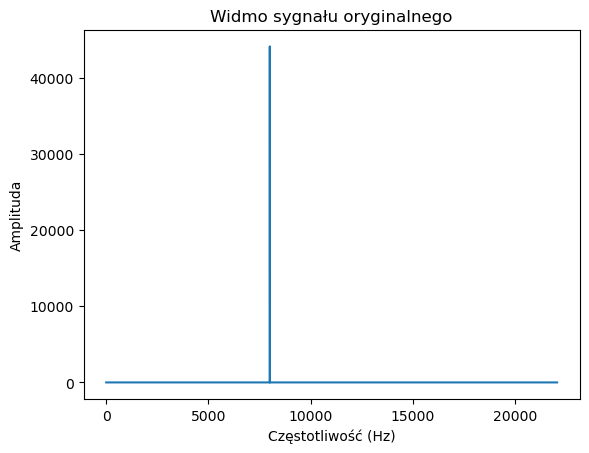

In [6]:
#widmo
Y = fft(y)
f_axis = np.linspace(0, fs/2, len(Y)//2)
plt.plot(f_axis, np.abs(Y[:len(Y)//2]))
plt.xlabel('Częstotliwość (Hz)')
plt.ylabel('Amplituda')
plt.title('Widmo sygnału oryginalnego')
plt.show()

In [8]:
#odtworzenie dźwięku
y = y / np.max(np.abs(y))  # Skalowanie do [-1, 1]
sd.play(y, samplerate=fs)
sd.wait()

### 2. Obniżenie częstotliwości próbkowania

In [11]:
from scipy.signal import resample

fs_low = 10000  # 10 kHz
num_samples = int(len(y) * fs_low / fs)
y_down = resample(y, num_samples)

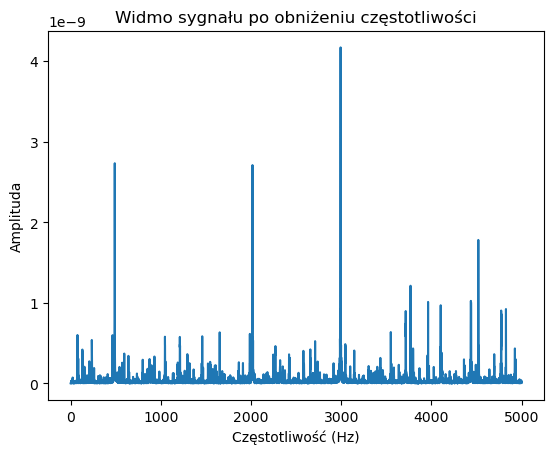

In [13]:
#widmo
Y = fft(y_down)
f_axis = np.linspace(0, fs_low/2, len(Y)//2)
plt.plot(f_axis, np.abs(Y[:len(Y)//2]))
plt.xlabel('Częstotliwość (Hz)')
plt.ylabel('Amplituda')
plt.title('Widmo sygnału po obniżeniu częstotliwości')
plt.show()

In [15]:
#odtworzenie dźwięku
y_down = y_down / np.max(np.abs(y_down))  # Skalowanie do [-1, 1]
sd.play(y_down, samplerate=fs_low)
sd.wait()

### 3. Efekt aliasingu

In [18]:
fs_alias = 6000  # 6 kHz
num_samples_alias = int(len(y) * fs_alias / fs)
y_alias = resample(y, num_samples_alias)

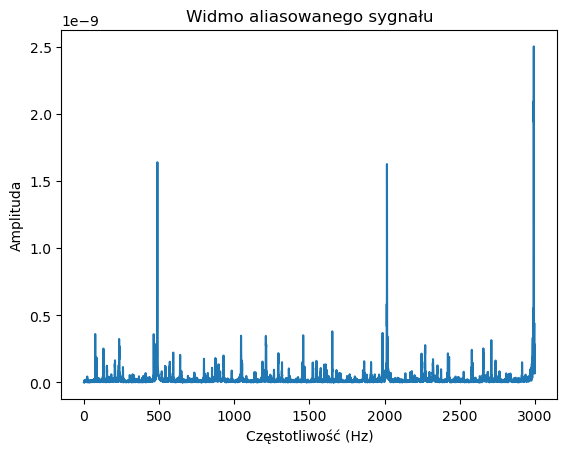

In [20]:
#widmo
Y = fft(y_alias)
f_axis = np.linspace(0, fs_alias/2, len(Y)//2)
plt.plot(f_axis, np.abs(Y[:len(Y)//2]))
plt.xlabel('Częstotliwość (Hz)')
plt.ylabel('Amplituda')
plt.title('Widmo aliasowanego sygnału')
plt.show()

In [22]:
#odtworzenie dźwięku
y_alias = y_alias / np.max(np.abs(y_alias))  # Skalowanie do [-1, 1]
sd.play(y_alias, samplerate=fs_alias)
sd.wait()